
# BADFit
This is a tutorial notebook for __[BADFit](https://github.com/samlaihei/BADFit)__, a code for fitting black hole accretion discs using models from Sherpa/XSpec with MCMC. The key features of this code are:
-  Provide a Bayesian framework to constrain BH properties from a provided Spectral Energy Distribution (SED) utilising ray-traced models of the multi-temperature thermal accretion disc emission around Kerr BHs. 
-  Use general extinction curve models to deredden the SED.
-  Define custom priors and parameter thresholds to influence the resulting model. Freely fix and vary different parameters.

### Installation
The recommended installation method is to use conda virtual environments. This section will guide the user through the basic installation steps which should work for most machines. Navigate to your designated installation directory and run in the terminal,
```
conda create -n sherpaciao -c https://cxc.cfa.harvard.edu/conda/ciao -c conda-forge ciao python=3.9

conda install -n sherpaciao --only-deps -c https://cxc.cfa.harvard.edu/conda/ciao -c conda-forge sherpa

conda activate sherpaciao

git clone https://github.com/sherpa/sherpa.git

cd sherpa/

./scripts/use_ciao_config

pip install .

cd ../

git clone https://github.com/samlaihei/BADFit.git

pip install scipy astropy pandas uncertainties scikit-learn specutils h5py matplotlib seaborn emcee corner chainconsumer dustmaps dust_extinction
```
The following is to setup the default dustmap.
```python
ipython
import dustmaps.sfd
dustmaps.sfd.fetch()
```
The code has been tested on Python 3.6 and 3.9.


### Features 
-  Use XSPEC models, namely **kerrbb** (thin disc) and **slimbh** (slim disc), to obtain posterior probability distributions under a Bayesian framework for black hole properties based on the observed SEDs.
-  Use the SFD dustmap to compute the colour excess and a Milky Way extinction curve to deredden the SED based on the coordinates of the target.
-  By default, the free black hole parameters are the black hole mass, spin, luminosity/accretion rate, and orientation, but any of the black hole parameters in the XSPEC models can be made to vary freely.
-  The black hole mass prior can be adjusted by using a typical black hole mass function or a log-normal Gaussian probability distribution. By default, the prior is a uniform distribution for all free parameters.
-  The uncertainty of each data point can be adjusted based on proximity to other data points.
-  The number of walkers and iterations can be customised and the result of each MCMC run is saved in a .h5 file. The posterior distributions and summary statistics can be accessed through the file with some of the methods provided.
-  Methods are provided to create corner plots with marginalised distributions, which also show the target SED, redshift, and maximum likelihood fits with 1 sigma spread.
-  If a spectrum is provided, there is a separate code for create synthetic photometry (fauxtometry), which selects from points in the spectrum that best represent the continuum emission, free of emission-lines.

### Authors
__[Samuel Lai](https://orcid.org/0000-0001-9372-4611)__; samuel.lai(at)anu.edu.au (Australian National University)

### Acknowledgements
If you found this code useful in any capacity, we would appreciate it if you could cite us. Please refer to the __[README.md](https://github.com/samlaihei/BADFit)__ in the repository for the most up-to-date citation.


### General Usage Procedure
1. Place the SED data, usually photometry, in the __[data/](https://github.com/samlaihei/BADFit/tree/main/datahttps://github.com/samlaihei/BADFit/tree/main/data)__ directory. The Wavelength axis should be in the rest-frame and in units of angstroms. The FluxDensity and eFluxDensity axes are in units of erg/s/cm^2/Hz and should be in the observed frame. There is also the option of using different units for the input, where the columns are Freq, Power, and ePower, in units of Hz and erg/s. The data does not have to be extinction-corrected. 
1. In the most basic run, provide the redshift of the target and its RA, Dec coordinates. Choose an XSPEC accretion disc model.


## Getting Started
In this example, we provide the photometry of one QSO at redshift z=4.692 in __[data/example.csv](https://github.com/samlaihei/BADFit/blob/main/data/example.csvhttps://github.com/samlaihei/BADFit/blob/main/data/example.csv)__. Here, we show what a basic MCMC run would look like.


In [1]:
import BADFit
import pandas as pd
import matplotlib.pyplot as plt
import os

os.system("mkdir output");

Text(0, 0.5, 'Flux (erg/s/cm$^2$/Hz)')

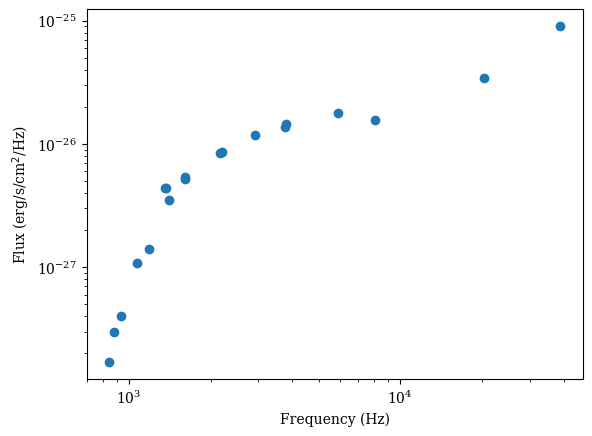

In [9]:
# Look at the data #
redshift = 4.692
datafile = 'data/example.csv'
pdata = pd.read_csv(datafile)

lams = pdata['Wavelength'].to_numpy() # rest-frame wavelength in angstrom 
flux = pdata['FluxDensity'].to_numpy() # flux density in erg/s/cm2/Hz
eflux = pdata['eFluxDensity'].to_numpy()

testObj = BADFit.BADFit('example', 'SLIMBH', lams, flux, eflux, redshift, ra=329.36758, dec=-36.03752)


fig, ax = plt.subplots()
ax.plot(lams, flux, 'o')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel(r'Flux (erg/s/cm$^2$/Hz)')

Running burn-in...
Running production...
-2.518241265895138
[ 0.89007913  0.4362593  10.97125576  2.10554759]

PLOTTING...


<AxesSubplot: xlabel='Rest Frequency [Hz]', ylabel='$\\nu L_{\\nu}$ [erg/s]'>

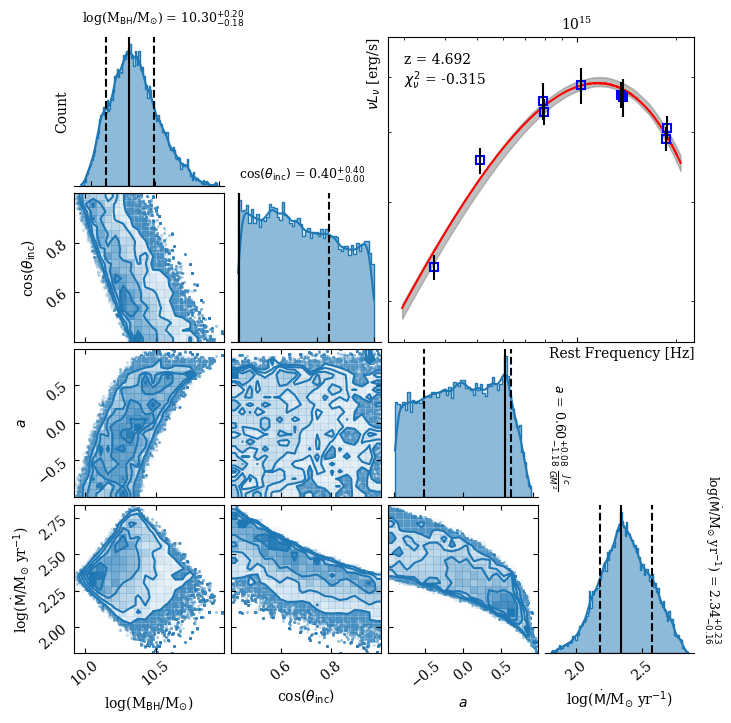

In [3]:
# Default MCMC run #
testObj.runMCMC(nwalkers=256, niter=512)


The basic number of walkers and iterations is 128x256. The two options for the model are 'KERRBB' and 'SLIMBH' for thin and slim discs respectively. This run also populates the output/ directory. To read the summary statistics from the .h5 file, use the h5ReadFile() method.

In [4]:
print(testObj.h5ReadFile(createPlot=False, returnMbh=False, returnArrays=True))

{'log(M$_{\\rm{BH}}$/M$_{\\odot}$)': [-0.5767705533345501, 0.6038984945063051, 0.6873386936834063], 'cos$(\\theta_{\\rm{inc}})$': [0.4018949191711725, 0.4018949191711725, 0.8035857739809773], '$a$': [10.117774532079576, 10.295983431786771, 10.495435083484901], 'log($\\dot{\\rm{M}}$/M$_{\\odot}$ yr$^{-1}$)': [2.1807507224021117, 2.342201961705384, 2.574553996185752]}
(array([[ 0.73775983,  0.9929919 , 10.34804983,  1.99042384],
       [ 0.51464352,  0.60780841, 10.50587843,  2.26670476],
       [ 0.16817928,  0.64641724, 10.38702372,  2.36585523],
       ...,
       [ 0.67500261,  0.66040916, 10.5509942 ,  2.15771338],
       [-0.4351238 ,  0.67897458, 10.21828195,  2.46269563],
       [-0.37893337,  0.67598509, 10.2341237 ,  2.4688494 ]]), array([[-3.90855556, -3.62780516, -3.81266783, ..., -2.99920508,
        -4.00743394, -3.18436739],
       [-3.90855556, -3.62780516, -3.18591192, ..., -2.9115476 ,
        -4.00743394, -3.18436739],
       [-4.20188301, -3.62780516, -3.03608477, ...

The parameters in the returned arrays follow the order of the free paramters, which for 'KERRBB' is spin, orientation, black hole mass, and accretion rate by default. For 'SLIMBH', it is black hole mass, spin, luminosity, and orientation. 

# Reading from the Model Grid

for a custom set of parameters


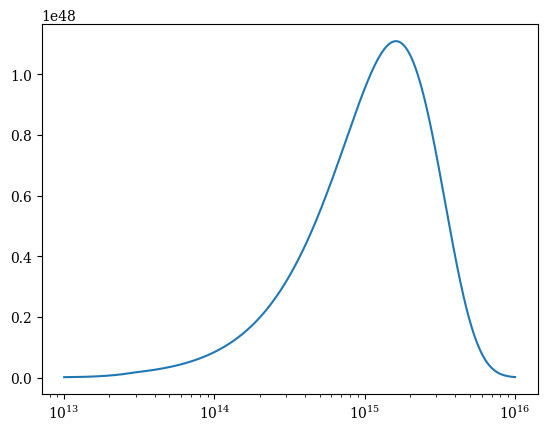

In [32]:
import numpy as np
freq = np.logspace(13, 16, 1000)
kerrbb_params = [0.0, 1, 10, 1] # KERRBB: spin, cos(i), log(mbh/msun), mdot in log(Msun/yr)
slimbh_params = [10, 0, 1, 1] # SLIMBH: log(mbh/msun), spin, cos(i), Ledd


testObj = BADFit.BADFit('example', 'SLIMBH', np.array([]), np.array([]), np.array([]), 0.1)

model = testObj.evalBHModel(slimbh_params, freq)


fig, ax = plt.subplots()
ax.plot(freq, model)
ax.set_xscale('log')
# ax.set_yscale('log')